Install Datasets

In [15]:
!pip install opendatasets
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/concaption/pepsico-lab-potato-quality-control", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  dylanwiner1


Your Kaggle Key:

  ········


100%|███████████████████████████████████████████████████████████████████████████████| 940M/940M [00:27<00:00, 35.5MB/s]



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


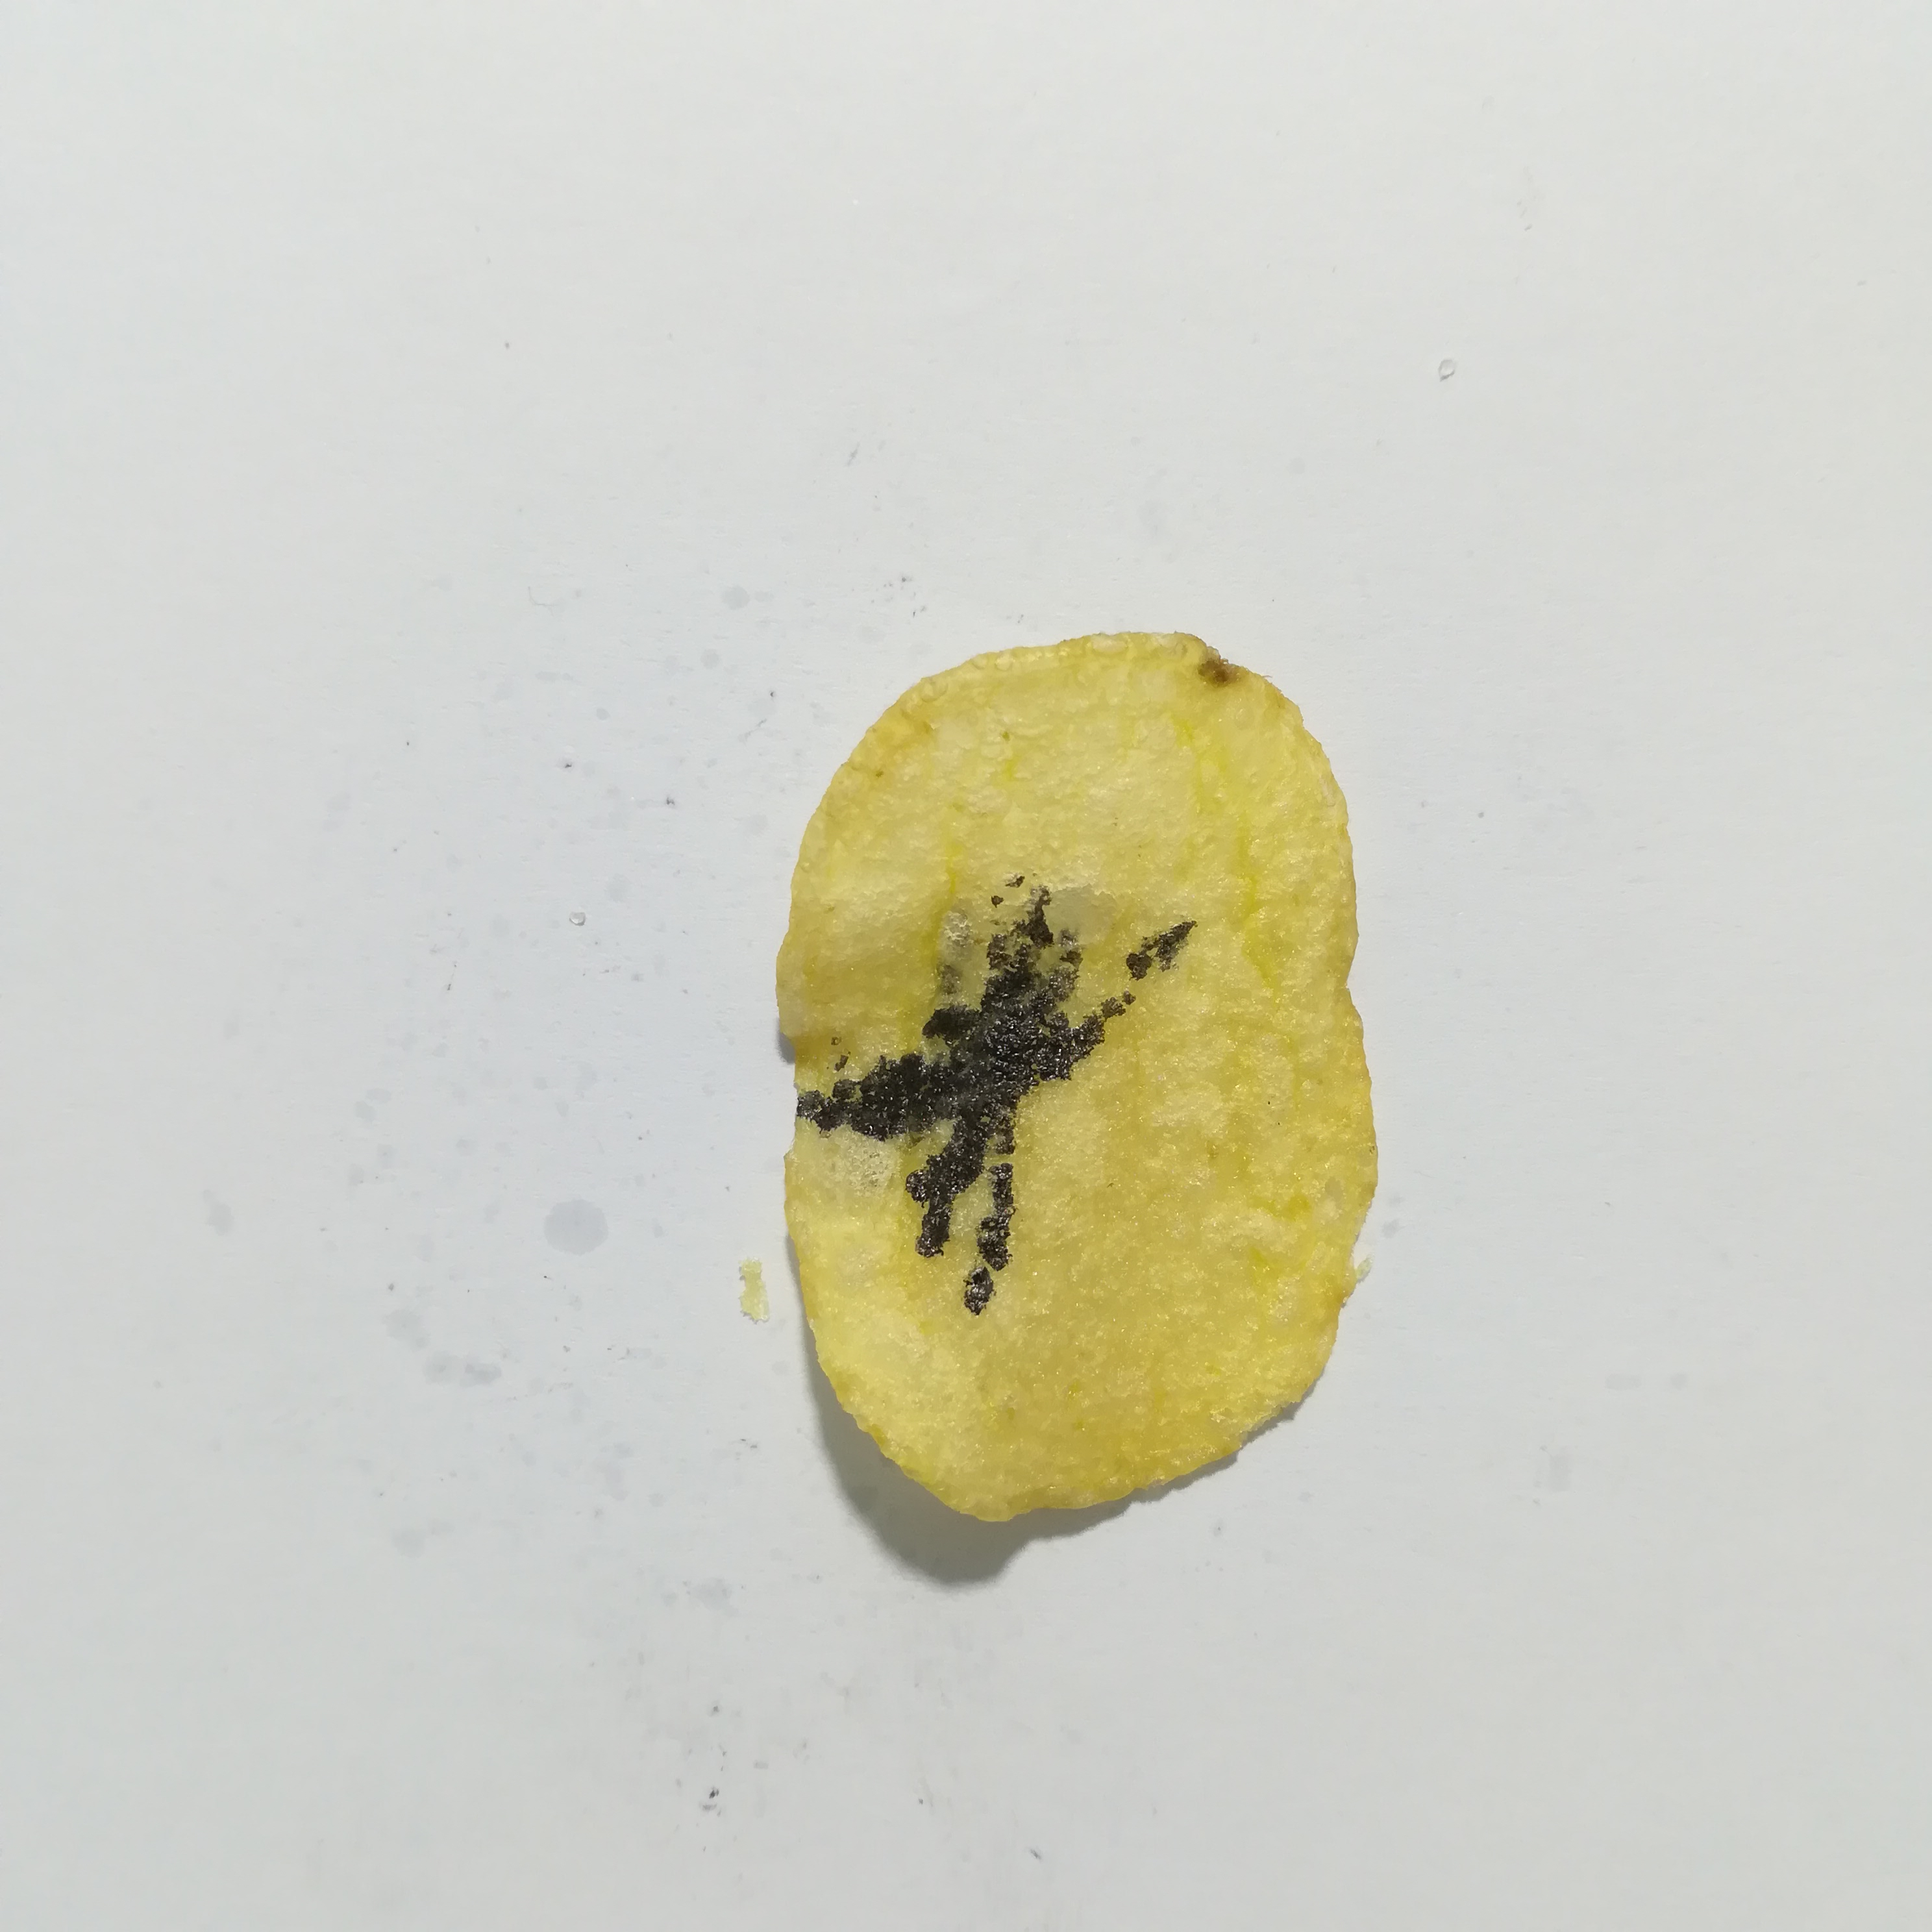

In [17]:
!pip install Pillow
from PIL import Image
sample_chip = Image.open(r"./pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Defective/IMG_20210319_010422.jpg")
display(sample_chip)

In [18]:
!pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import cv2

img1 = cv2.imread(r"./pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Defective/IMG_20210319_010422.jpg")  # open up baseline image
cv2.namedWindow('Baseline Image normal', cv2.WINDOW_NORMAL)
cv2.imshow('Baseline Image normal', img1)  # display black and white image

grayImage = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # convert from color to gray
(thresh, img1_bw) = cv2.threshold(img1, 115, 255, cv2.THRESH_BINARY)  # convert from gray to black and white
#cv2.namedWindow('Baseline Image Gray', cv2.WINDOW_NORMAL)
#cv2.imshow('Baseline Image Gray', grayImage)  # display black and white image
cv2.namedWindow('Baseline Image BW', cv2.WINDOW_NORMAL)
cv2.imshow('Baseline Image BW', img1_bw)  # display black and white image
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
import numpy as np

def bgremove1(myimage):
 
    # Blur to image to reduce noise
    myimage = cv2.GaussianBlur(myimage,(5,5), 0)
 
    # We bin the pixels. Result will be a value 1..5
    bins=np.array([0,51,102,153,204,255])
    myimage[:,:,:] = np.digitize(myimage[:,:,:],bins,right=True)*51
 
    # Create single channel greyscale for thresholding
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
 
    # Perform Otsu thresholding and extract the background.
    # We use Binary Threshold as we want to create an all white background
    ret,background = cv2.threshold(myimage_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
 
    # Perform Otsu thresholding and extract the foreground.
    # We use TOZERO_INV as we want to keep some details of the foregorund
    ret,foreground = cv2.threshold(myimage_grey,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)  #Currently foreground is only a mask
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
 
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
 
    return finalimage

def bgremove2(myimage):
    # First Convert to Grayscale
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
    ret,baseline = cv2.threshold(myimage_grey,165,255,cv2.THRESH_TRUNC)
    ret,background = cv2.threshold(baseline,164,255,cv2.THRESH_BINARY)
    ret,foreground = cv2.threshold(baseline,164,255,cv2.THRESH_BINARY_INV)
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
    return finalimage


def bgremove3(myimage):
    # BG Remover 3
    myimage_hsv = cv2.cvtColor(myimage, cv2.COLOR_BGR2HSV)
     
    #Take S and remove any value that is less than half
    s = myimage_hsv[:,:,1]
    s = np.where(s < 80, 0, 1) # Any value below 127 will be excluded
 
    # We increase the brightness of the image and then mod by 255
    v = (myimage_hsv[:,:,2] + 80) % 255
    v = np.where(v > 80, 1, 0)  # Any value above 127 will be part of our mask
 
    # Combine our two masks based on S and V into a single "Foreground"
    foreground = np.where(s+v > 0, 1, 0).astype(np.uint8)  #Casting back into 8bit integer
 
    background = np.where(foreground==0,255,0).astype(np.uint8) # Invert foreground to get background in uint8
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)  # Convert background back into BGR space
    foreground=cv2.bitwise_and(myimage,myimage,mask=foreground) # Apply our foreground map to original image
    finalimage = background+foreground # Combine foreground and background
    #img_np = np.array(finalimage)

    return finalimage
    
removed_img = bgremove3(img1)
cv2.namedWindow('Removed background', cv2.WINDOW_NORMAL)
cv2.imshow('Removed background', removed_img)  # display black and white image
cv2.waitKey(0)
cv2.destroyAllWindows()